In [1]:
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings('ignore')

# 파일 불러오기
all = pd.read_excel("../데이터자료/Join_data.xlsx", index_col = 0)    

# 컬럼 추출
# all2 = all[['DateTime', '종가_ex','1Y_전일비_irs', '2Y_전일비_irs', '3Y_전일비_irs',
#         '5Y_전일비_irs', '10Y_전일비_irs',  '1Y_전일비_crs', '2Y_전일비_crs','3Y_전일비_crs','5Y_전일비_crs','10Y_전일비_crs',
#         '국고1년', '국고3년', '국고5년','국고10년', '통안364일', '통안2년', 'Mid_ndf',
#         'M1_스왑포인트']]            # [[]] 대괄호 2개 사용 -> 데이터 프레임형태로 나옴

all2 = all[['DateTime', '종가_ex','1Y_Mid_irs', '2Y_Mid_irs', '3Y_Mid_irs',
        '5Y_Mid_irs', '10Y_Mid_irs',  '1Y_Mid_crs', '2Y_Mid_crs','3Y_Mid_crs','5Y_Mid_crs','10Y_Mid_crs',
        '1Y_베이시스', '2Y_베이시스', '3Y_베이시스', '5Y_베이시스', '10Y_베이시스',
        '국고1년', '국고3년', '국고5년','국고10년', '통안364일', '통안2년', 'Mid_ndf',
        'M1_스왑포인트']]     
        
all2 = all2.set_index("DateTime")
all2['대비_베이시스1년'] = all2['1Y_베이시스']-all2['1Y_베이시스'].shift(1)
all2['대비_베이시스2년'] = all2['2Y_베이시스']-all2['2Y_베이시스'].shift(1)
all2['대비_베이시스3년'] = all2['3Y_베이시스']-all2['3Y_베이시스'].shift(1)
all2['대비_베이시스5년'] =all2['5Y_베이시스']-all2['5Y_베이시스'].shift(1)
all2['대비_베이시스10년'] = all2['10Y_베이시스']-all2['10Y_베이시스'].shift(1)
all2['1Y_대비_irs'] = all2['1Y_Mid_irs']-all2['1Y_Mid_irs'].shift(1)
all2['2Y_대비_irs'] = all2['2Y_Mid_irs']-all2['2Y_Mid_irs'].shift(1)
all2['3Y_대비_irs'] = all2['3Y_Mid_irs']-all2['3Y_Mid_irs'].shift(1)
all2['5Y_대비_irs'] = all2['5Y_Mid_irs']-all2['5Y_Mid_irs'].shift(1)
all2['10Y_대비_irs'] = all2['10Y_Mid_irs']-all2['10Y_Mid_irs'].shift(1)
all2['1Y_대비_crs'] = all2['1Y_Mid_crs']-all2['1Y_Mid_crs'].shift(1)
all2['2Y_대비_crs'] = all2['2Y_Mid_crs']-all2['2Y_Mid_crs'].shift(1)
all2['3Y_대비_crs'] = all2['3Y_Mid_crs']-all2['3Y_Mid_crs'].shift(1)
all2['5Y_대비_crs'] = all2['5Y_Mid_crs']-all2['5Y_Mid_crs'].shift(1)
all2['10Y_대비_crs'] = all2['10Y_Mid_crs']-all2['10Y_Mid_crs'].shift(1)

all2['대비_국고1년'] = all2['국고1년']-all2['국고1년'].shift(1)
all2['대비_국고3년'] = all2['국고3년']-all2['국고3년'].shift(1)
all2['대비_국고5년'] = all2['국고5년']-all2['국고5년'].shift(1)
all2['대비_국고10년'] = all2['국고10년']-all2['국고10년'].shift(1)
all2['대비_통안1년'] = all2['통안364일']-all2['통안364일'].shift(1)
all2['대비_통안2년'] = all2['통안364일']-all2['통안364일'].shift(1)
all2['대비_ndf'] = all2['Mid_ndf']-all2['Mid_ndf'].shift(1)
all2['스왑포인트_1월물'] = all2["M1_스왑포인트"]/100 
all2['전일종가_ex'] = all2['종가_ex'].shift(1)

# all2.rename({"1Y_전일비_irs" : "1Y_대비_irs", "2Y_전일비_irs" : "2Y_대비_irs", "3Y_전일비_irs" : "3Y_대비_irs", "5Y_전일비_irs" : "5Y_대비_irs", "10Y_전일비_irs" : "10Y_대비_irs",
#             "1Y_전일비_crs" : "1Y_대비_crs", "2Y_전일비_crs" : "2Y_대비_crs", "3Y_전일비_crs" : "3Y_대비_crs", "5Y_전일비_crs" : "5Y_대비_crs", "10Y_전일비_crs" : "10Y_대비_crs"}, axis=1, inplace=True)

all2 = all2.dropna()

# 필요 칼럼만 남기기
df = all2.copy()
df = all2[["종가_ex", 
            '1Y_대비_irs', '2Y_대비_irs', '3Y_대비_irs', '5Y_대비_irs', '10Y_대비_irs', 
            '1Y_대비_crs', '2Y_대비_crs', '3Y_대비_crs', '5Y_대비_crs', '10Y_대비_crs', 
            "대비_베이시스1년", "대비_베이시스2년", "대비_베이시스3년", "대비_베이시스5년","대비_베이시스10년", 
            "대비_국고1년", "대비_국고3년", "대비_국고5년", "대비_국고10년", "대비_통안1년", "대비_통안2년",
            "대비_ndf", "스왑포인트_1월물", "전일종가_ex"]] # , "전일종가_ex"

# DateTime을 인덱스로 바꿔주기
df

,종가_ex,1Y_대비_irs,2Y_대비_irs,3Y_대비_irs,5Y_대비_irs,10Y_대비_irs,1Y_대비_crs,2Y_대비_crs,3Y_대비_crs,5Y_대비_crs,...,대비_베이시스10년,대비_국고1년,대비_국고3년,대비_국고5년,대비_국고10년,대비_통안1년,대비_통안2년,대비_ndf,스왑포인트_1월물,전일종가_ex
DateTime,,,,,,,,,,,,,,,,,,,,,
2012-08-02,1131.7,-0.03,-0.05,-0.05,-0.05,-0.05,-0.01,0.030,0.04,0.04,...,9.0,-0.03,-0.04,-0.04,-0.04,-0.03,-0.03,1.75,2.50,1126.5
2012-08-03,1134.8,-0.03,-0.03,-0.03,-0.03,-0.02,-0.01,-0.015,-0.02,-0.08,...,-13.0,-0.02,-0.02,-0.07,-0.07,-0.02,-0.02,4.00,2.40,1131.7
2012-08-06,1129.0,0.02,0.02,0.02,0.02,0.01,0.00,-0.025,-0.03,-0.04,...,-5.0,0.01,0.01,0.00,0.00,0.01,0.01,-9.50,2.40,1134.8
2012-08-07,1128.8,0.01,0.00,0.00,0.01,0.02,0.02,0.015,0.00,-0.07,...,-10.0,-0.01,0.00,0.00,0.00,-0.01,-0.01,0.50,2.50,1129.0
2012-08-08,1128.3,0.01,0.02,0.02,0.02,0.03,0.01,0.000,0.00,-0.02,...,-7.0,-0.01,-0.02,-0.02,-0.02,-0.01,-0.01,1.25,2.40,1128.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,1313.7,-0.04,-0.08,-0.07,-0.09,-0.11,-0.08,-0.090,-0.07,-0.11,...,0.0,-0.02,-0.06,-0.07,-0.09,-0.01,-0.01,3.35,-0.60,1313.0
2022-07-26,1307.6,-0.01,-0.02,-0.03,-0.03,-0.03,0.01,-0.030,-0.03,-0.02,...,1.0,0.01,-0.03,-0.02,-0.03,0.01,0.01,1.15,-0.70,1313.7
2022-07-27,1313.3,-0.01,-0.05,-0.06,-0.06,-0.06,0.01,-0.010,-0.01,-0.01,...,5.0,0.00,-0.03,-0.05,-0.06,0.02,0.02,-0.50,-0.55,1307.6


In [2]:
#스케일링 전 샤피로 테스트
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import kstest

for i in df.columns:
    a = stats.shapiro(df[i])
    p = a.pvalue   
    print(i,p)

종가_ex 3.920065430574292e-14
1Y_대비_irs 0.0
2Y_대비_irs 0.0
3Y_대비_irs 0.0
5Y_대비_irs 0.0
10Y_대비_irs 0.0
1Y_대비_crs 0.0
2Y_대비_crs 0.0
3Y_대비_crs 0.0
5Y_대비_crs 8.23593464545309e-37
10Y_대비_crs 1.401298464324817e-45
대비_베이시스1년 0.0
대비_베이시스2년 0.0
대비_베이시스3년 0.0
대비_베이시스5년 0.0
대비_베이시스10년 0.0
대비_국고1년 0.0
대비_국고3년 0.0
대비_국고5년 2.1934098282953767e-30
대비_국고10년 9.75201436382177e-40
대비_통안1년 0.0
대비_통안2년 0.0
대비_ndf 2.5543208566629512e-14
스왑포인트_1월물 1.839276334961876e-24
전일종가_ex 5.380201153841989e-14


In [3]:
#스케일링 전 ks테스트
for i in df.columns:
    a = kstest(df[i],'norm')
    p = a.pvalue
    print(i,p)
        

종가_ex 0.0
1Y_대비_irs 0.0
2Y_대비_irs 0.0
3Y_대비_irs 0.0
5Y_대비_irs 0.0
10Y_대비_irs 0.0
1Y_대비_crs 0.0
2Y_대비_crs 0.0
3Y_대비_crs 0.0
5Y_대비_crs 0.0
10Y_대비_crs 0.0
대비_베이시스1년 3.404756942477778e-138
대비_베이시스2년 9.874219690473493e-139
대비_베이시스3년 2.554331478893163e-161
대비_베이시스5년 7.71779193697715e-176
대비_베이시스10년 1.46723179934958e-191
대비_국고1년 0.0
대비_국고3년 0.0
대비_국고5년 0.0
대비_국고10년 0.0
대비_통안1년 0.0
대비_통안2년 0.0
대비_ndf 1.2386561181451482e-239
스왑포인트_1월물 1.7261092244135925e-88
전일종가_ex 0.0


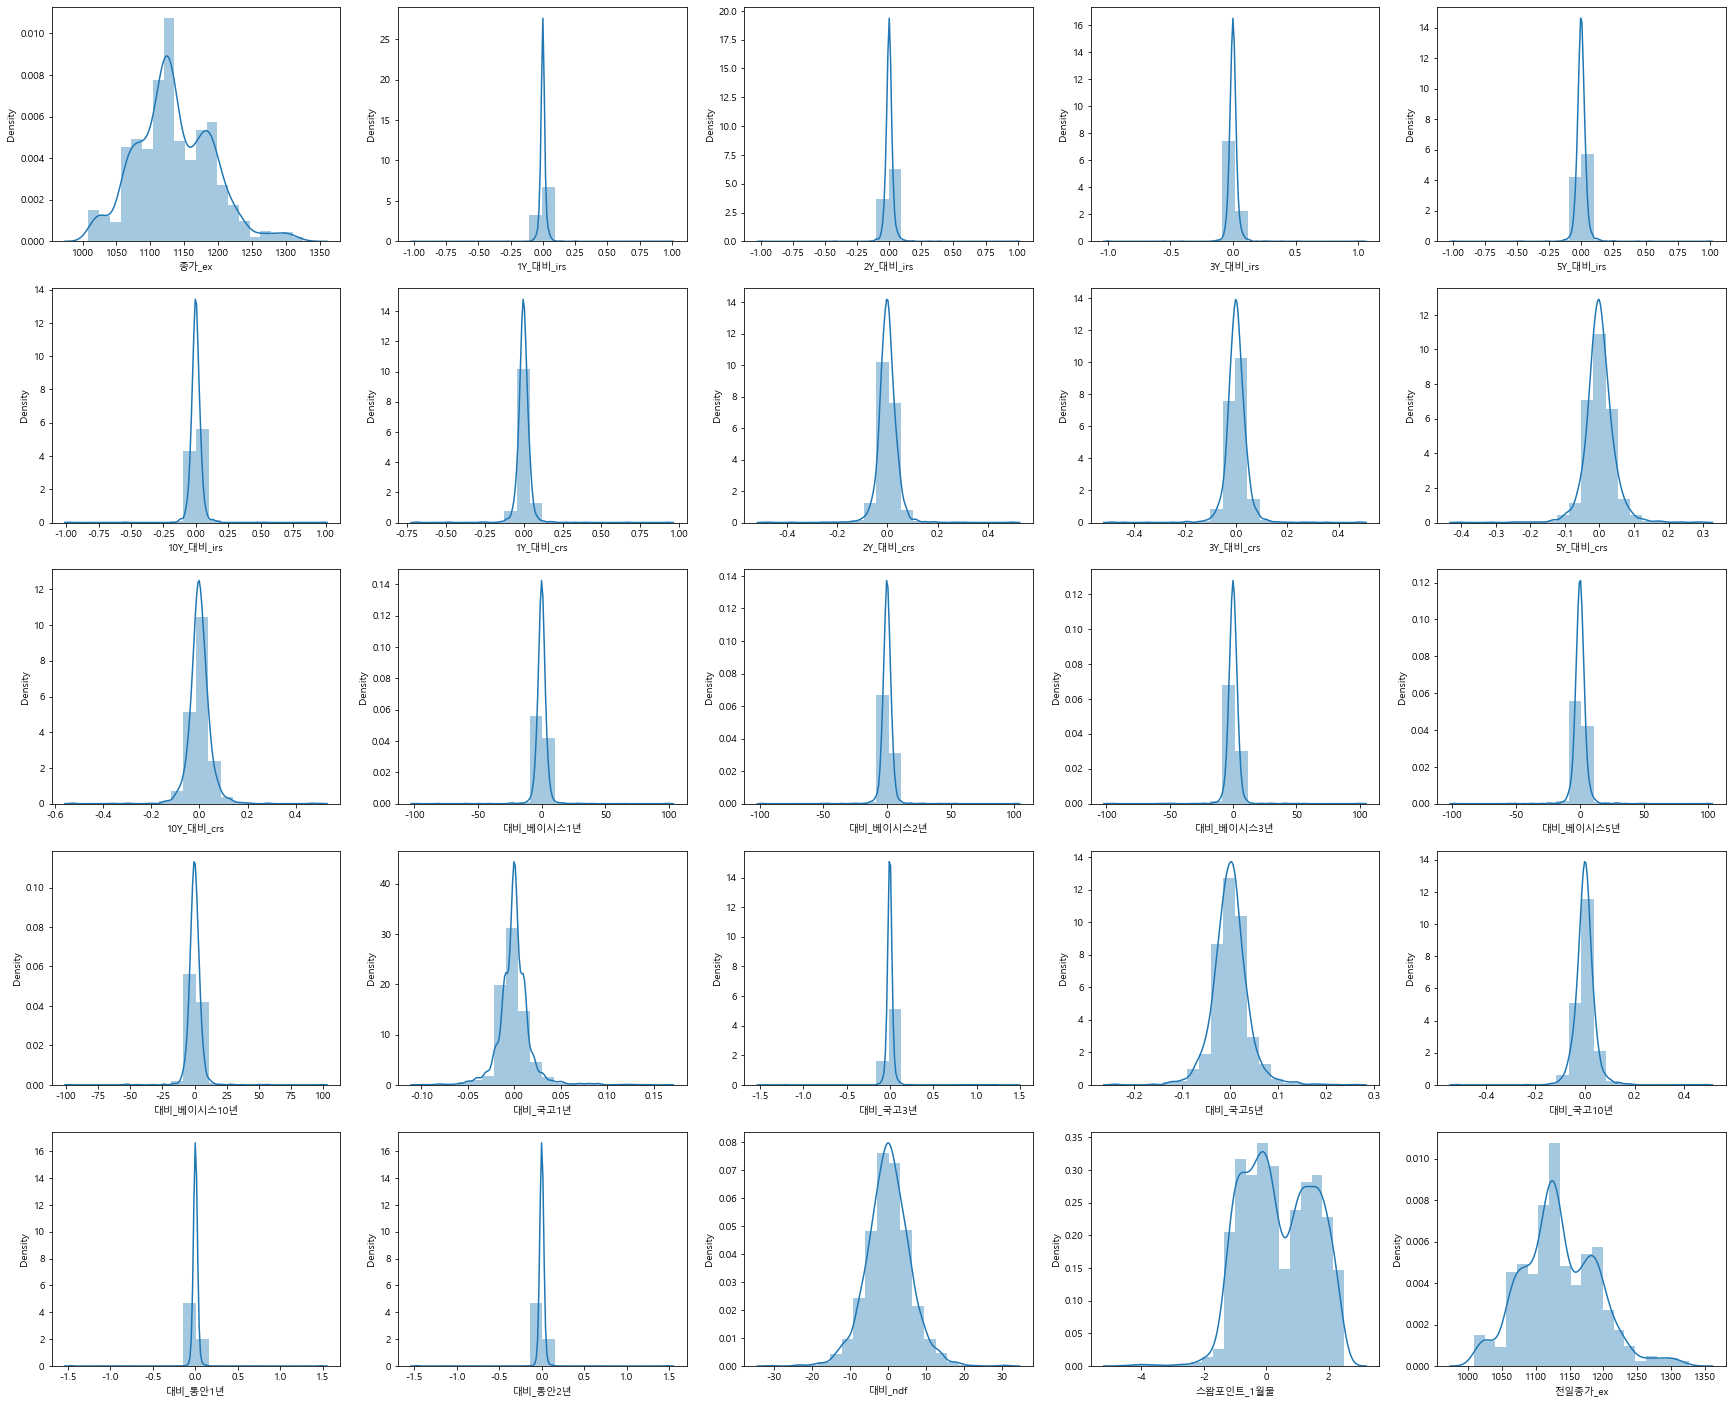

In [4]:
## histogram
col_n = 5
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(df.columns):
    sns.distplot(df[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])

종가_ex
1Y_대비_irs
2Y_대비_irs
3Y_대비_irs
5Y_대비_irs
10Y_대비_irs
1Y_대비_crs
2Y_대비_crs
3Y_대비_crs
5Y_대비_crs
10Y_대비_crs
대비_베이시스1년
대비_베이시스2년
대비_베이시스3년
대비_베이시스5년
대비_베이시스10년
대비_국고1년
대비_국고3년
대비_국고5년
대비_국고10년
대비_통안1년
대비_통안2년
대비_ndf
스왑포인트_1월물
전일종가_ex


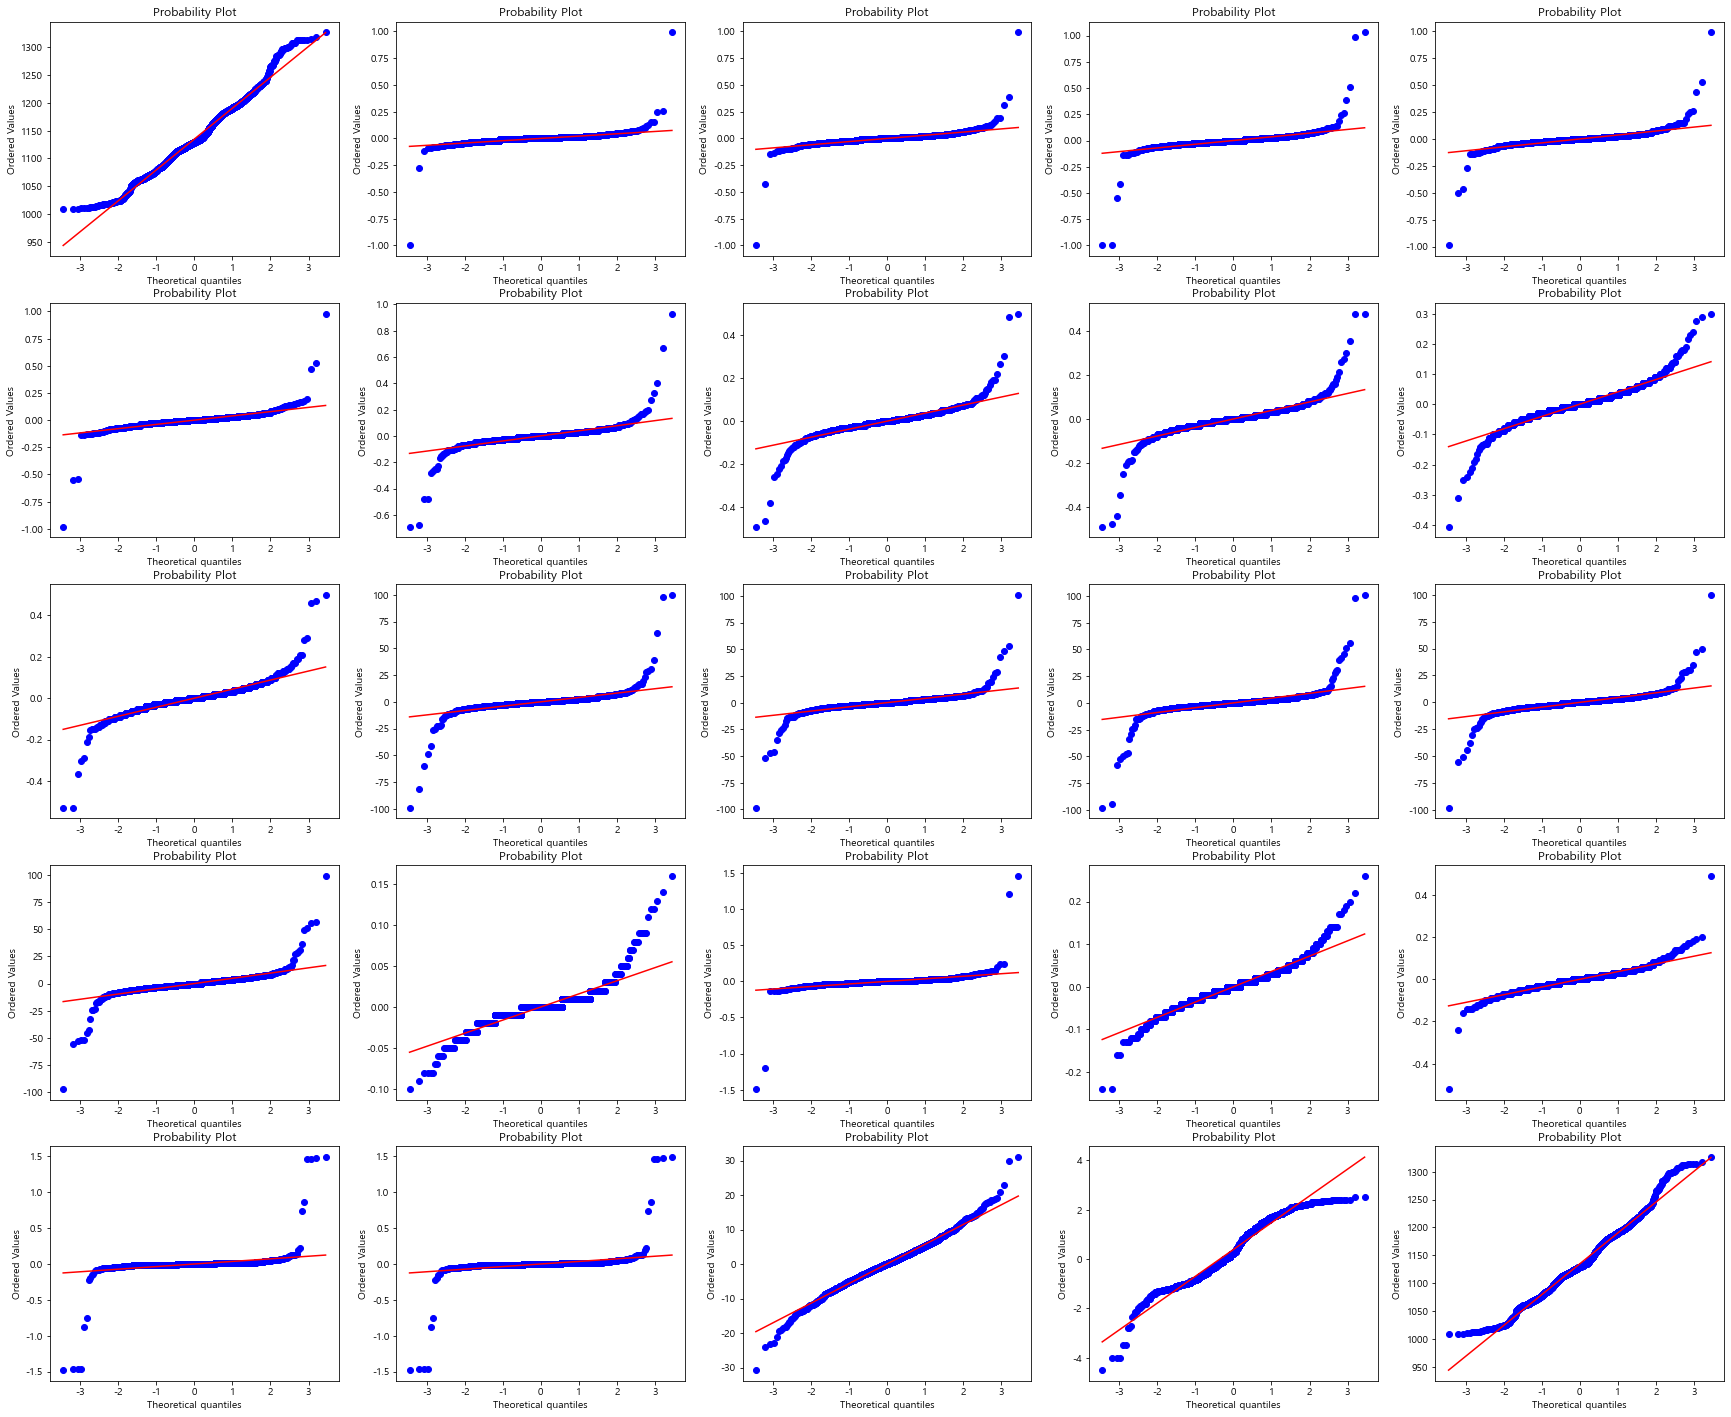

In [11]:
## histogram
col_n = 5
row_n = 5

# stats.probplot(df["대비_국고1년"], dist=stats.norm, plot=plt)
# plt.show()
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(df.columns):
    stats.probplot(df[col],dist=stats.norm, plot=ax[int(i/col_n),int(i%col_n)])
    print(col)
    

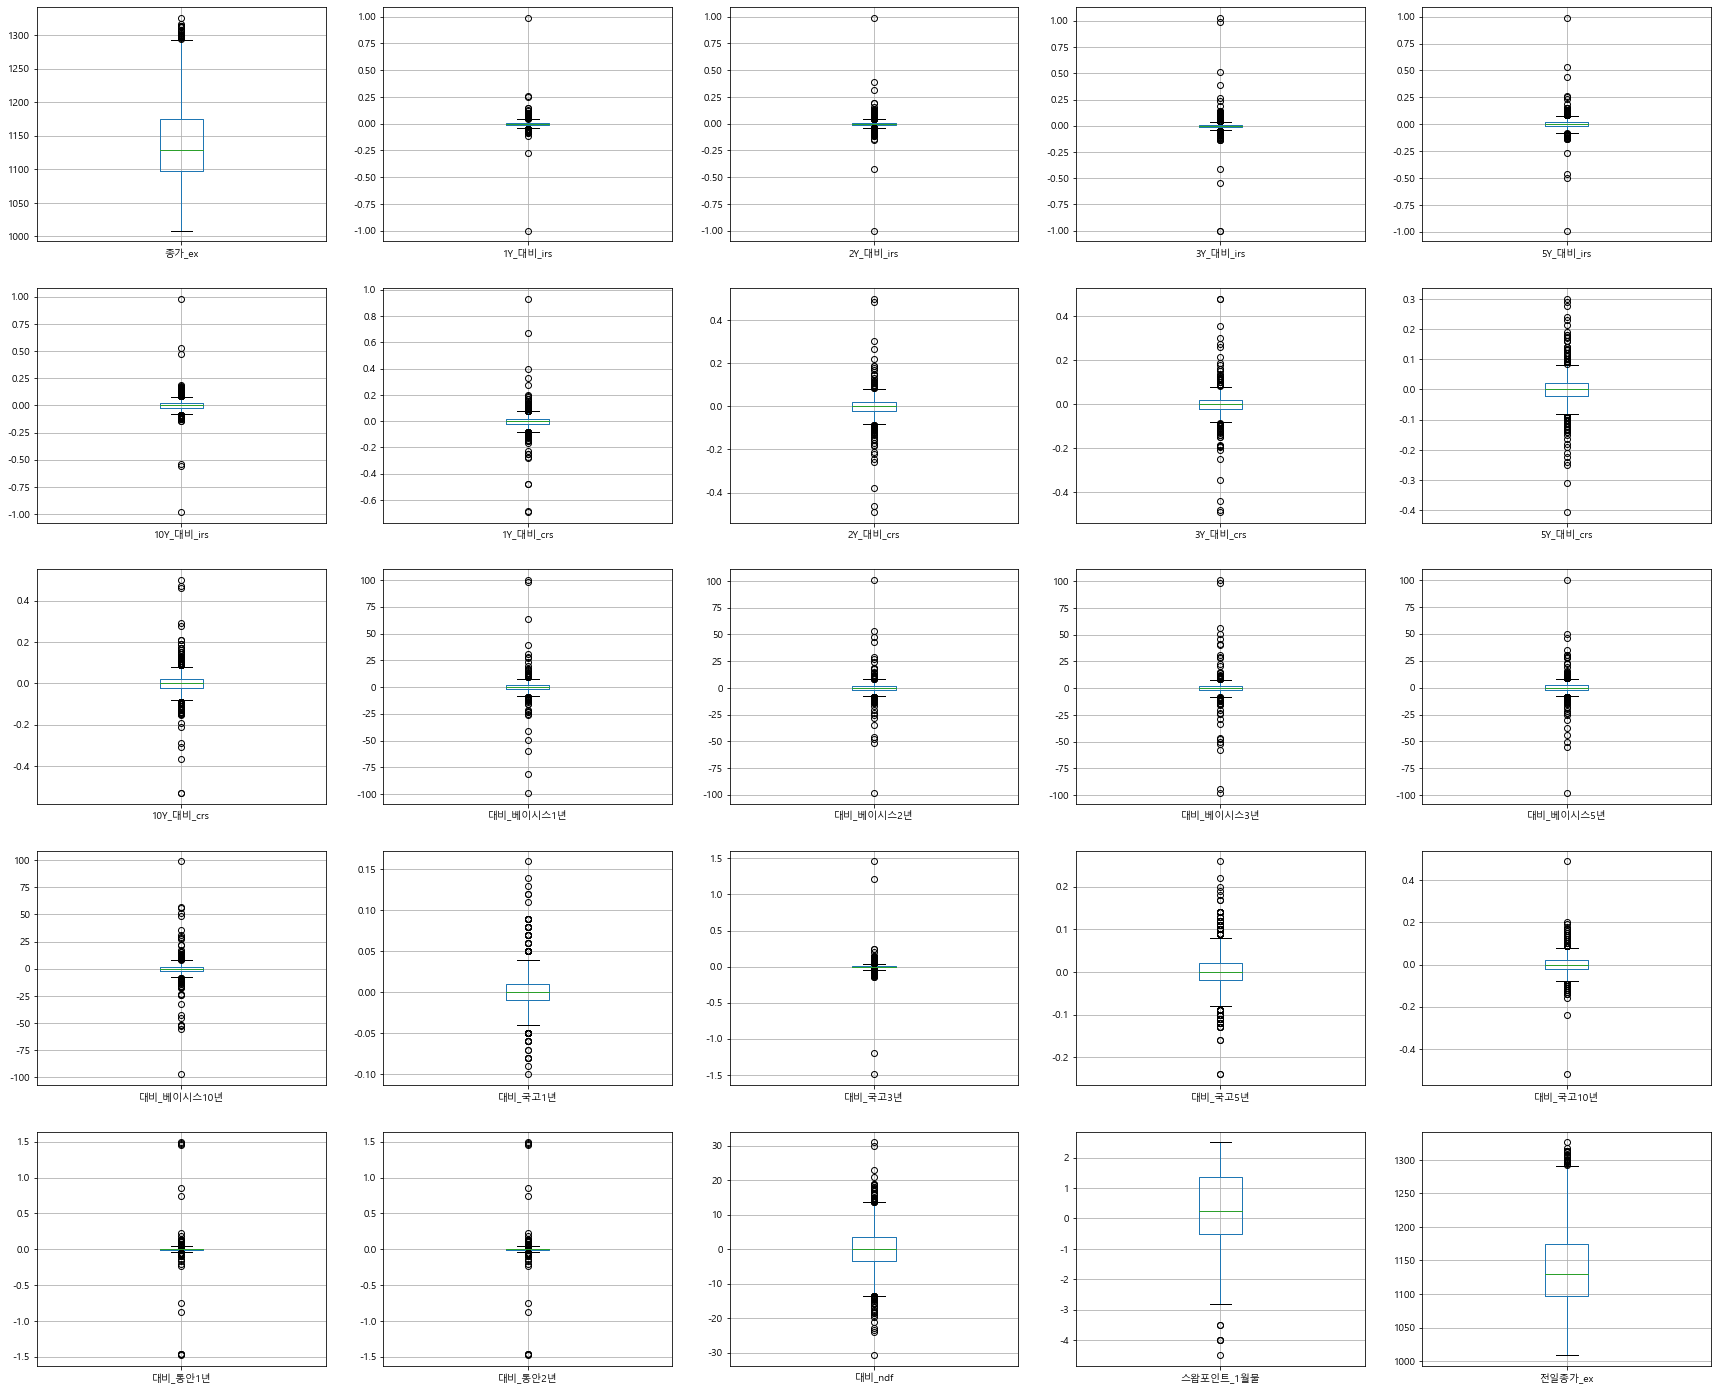

In [16]:
# 각각의 그래프에 대한 해석이 필요했음

from matplotlib import rc 
col_n = 5
row_n = 5

# stats.probplot(df["대비_국고1년"], dist=stats.norm, plot=plt)
# plt.show()
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(df.columns):
    df.boxplot(column=col,ax=ax[int(i/col_n),int(i%col_n)])

In [ ]:
# 정규성 없는거 확인 
# 스케일링 코드
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

scaler.fit(df)
df_Data_scaled= scaler.transform(df)
df_scaled = pd.DataFrame (data = df_Data_scaled, columns=df.columns)
df_scaled

,종가_ex,1Y_대비_irs,2Y_대비_irs,3Y_대비_irs,5Y_대비_irs,10Y_대비_irs,1Y_대비_crs,2Y_대비_crs,3Y_대비_crs,5Y_대비_crs,...,대비_베이시스10년,대비_국고1년,대비_국고3년,대비_국고5년,대비_국고10년,대비_통안1년,대비_통안2년,대비_ndf,스왑포인트_1월물,전일종가_ex
0,-0.057394,-0.847862,-1.217081,-0.935854,-1.045679,-1.009126,-0.205655,0.707360,0.905480,0.926463,...,1.488363,-1.698057,-0.646622,-1.079749,-1.027569,-0.325920,-0.325920,0.293727,1.909409,-0.149841
1,-0.001687,-0.847862,-0.731532,-0.562378,-0.628002,-0.403231,-0.205655,-0.364505,-0.463176,-1.872849,...,-2.158344,-1.132651,-0.323869,-1.890219,-1.798403,-0.217574,-0.217574,0.686290,1.818881,-0.056232
2,-0.105913,0.560374,0.482340,0.371312,0.416191,0.202663,-0.003373,-0.602697,-0.691285,-0.939745,...,-0.832269,0.563566,0.160261,0.000879,0.000209,0.107465,0.107465,-1.669093,1.818881,-0.000426
3,-0.109507,0.278727,-0.003209,-0.002164,0.207352,0.404628,0.401191,0.350072,-0.006957,-1.639573,...,-1.661066,-0.567245,-0.001116,0.000879,0.000209,-0.109228,-0.109228,0.075636,1.909409,-0.104837
4,-0.118491,0.278727,0.482340,0.371312,0.416191,0.606592,0.198909,-0.007216,-0.006957,-0.473193,...,-1.163788,-0.567245,-0.323869,-0.539435,-0.513680,-0.109228,-0.109228,0.206490,1.818881,-0.108437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454,3.213131,-1.129510,-1.945404,-1.309330,-1.881032,-2.220914,-1.621628,-2.150945,-1.603722,-2.572677,...,-0.003472,-1.132651,-0.969375,-1.890219,-2.312292,-0.109228,-0.109228,0.572883,-0.896960,3.207485
2455,3.103515,-0.284568,-0.488757,-0.562378,-0.628002,-0.605196,0.198909,-0.721793,-0.691285,-0.473193,...,0.162288,0.563566,-0.485246,-0.539435,-0.770625,0.107465,0.107465,0.189043,-0.987488,3.220086
2456,3.205943,-0.284568,-1.217081,-1.122592,-1.254517,-1.211091,0.198909,-0.245409,-0.235067,-0.239917,...,0.825326,-0.001839,-0.485246,-1.349905,-1.541458,0.215812,0.215812,-0.098837,-0.851696,3.110275
2457,2.896861,0.842021,0.967889,0.931525,1.042706,1.414452,0.805755,0.945552,0.905480,0.693187,...,-0.832269,0.563566,0.644391,0.811350,2.055766,0.215812,0.215812,-0.796728,-0.942224,3.212885


In [ ]:
#스케일링 전 정규성테스트
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import kstest

for i in df_scaled.columns:
    a = stats.shapiro(df_scaled[i])
    p = a.pvalue   
    print(i,p)

종가_ex 3.9252414795083734e-14
1Y_대비_irs 0.0
2Y_대비_irs 0.0
3Y_대비_irs 0.0
5Y_대비_irs 0.0
10Y_대비_irs 0.0
1Y_대비_crs 0.0
2Y_대비_crs 0.0
3Y_대비_crs 0.0
5Y_대비_crs 8.234338286242531e-37
10Y_대비_crs 1.401298464324817e-45
대비_베이시스1년 0.0
대비_베이시스2년 0.0
대비_베이시스3년 0.0
대비_베이시스5년 0.0
대비_베이시스10년 0.0
대비_국고1년 0.0
대비_국고3년 0.0
대비_국고5년 2.1952360763188142e-30
대비_국고10년 9.742555599187577e-40
대비_통안1년 0.0
대비_통안2년 0.0
대비_ndf 2.55355615531817e-14
스왑포인트_1월물 1.8377327313855848e-24
전일종가_ex 5.373047791195837e-14


In [ ]:
#스케일링후 ks테스트
for i in df_scaled.columns:
    a = kstest(df_scaled[i],'norm')
    p = a.pvalue
    print(i,p)

종가_ex 2.8103063334460087e-10
1Y_대비_irs 7.781381000076603e-146
2Y_대비_irs 3.72092702112511e-76
3Y_대비_irs 1.5378288276725225e-107
5Y_대비_irs 1.5982879971804987e-60
10Y_대비_irs 4.188321449142252e-49
1Y_대비_crs 1.3815654056596977e-66
2Y_대비_crs 2.0261572347503516e-33
3Y_대비_crs 1.6014092178456487e-39
5Y_대비_crs 8.378162639441963e-27
10Y_대비_crs 5.1302117740897364e-33
대비_베이시스1년 6.1501241790348544e-80
대비_베이시스2년 1.5341410385089193e-52
대비_베이시스3년 6.909229002068406e-79
대비_베이시스5년 4.043555177060126e-52
대비_베이시스10년 5.927015757069203e-54
대비_국고1년 1.872475877938911e-97
대비_국고3년 1.1663957636288965e-128
대비_국고5년 4.179742618267322e-25
대비_국고10년 6.1437949878987035e-28
대비_통안1년 1.4581796730648433e-289
대비_통안2년 1.4581796730648433e-289
대비_ndf 0.014841214923748193
스왑포인트_1월물 1.3389523680990893e-11
전일종가_ex 3.024959217670751e-10


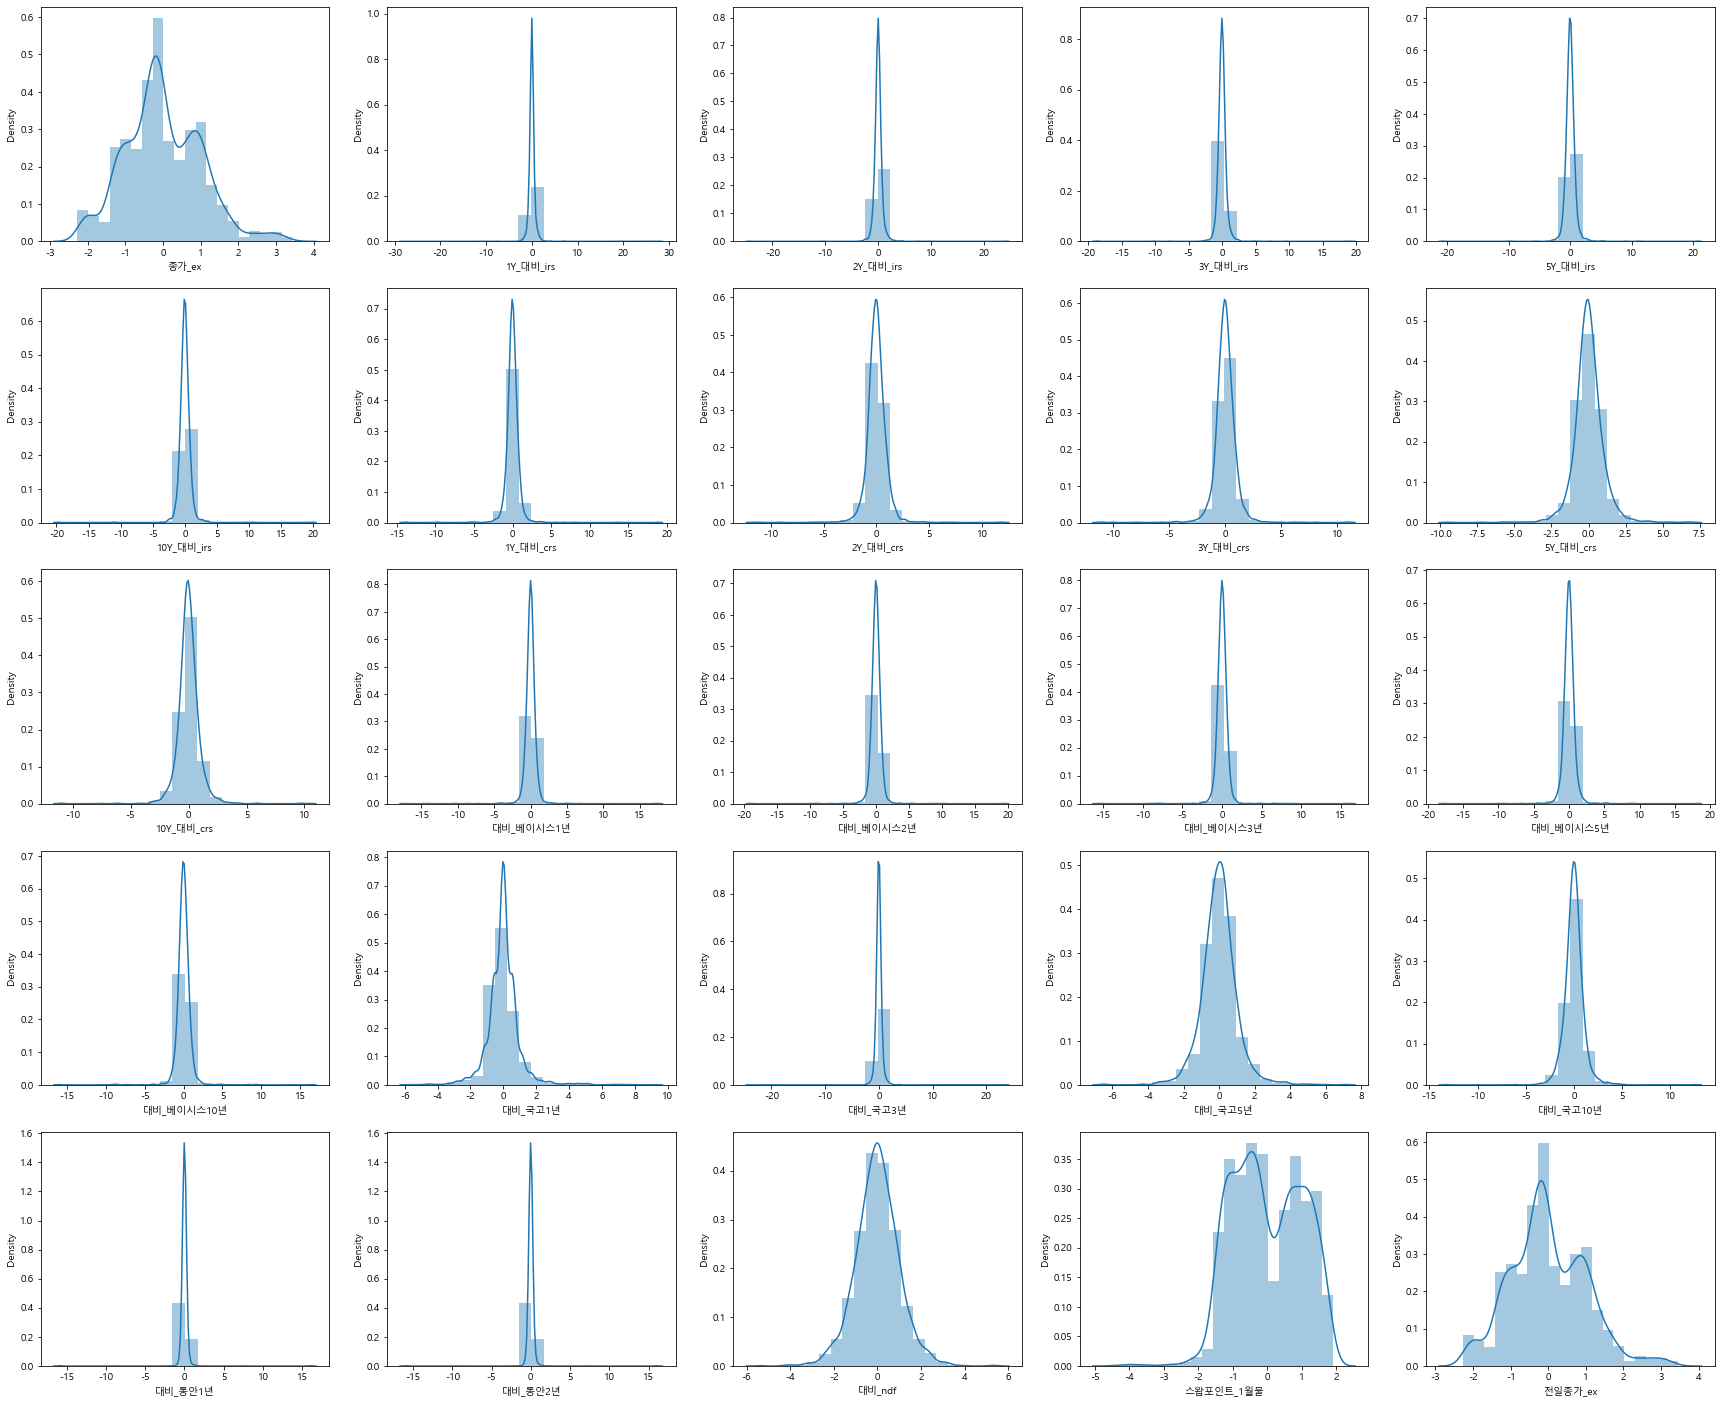

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

## histogram
col_n = 5
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(df_scaled.columns):
    sns.distplot(df_scaled[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])

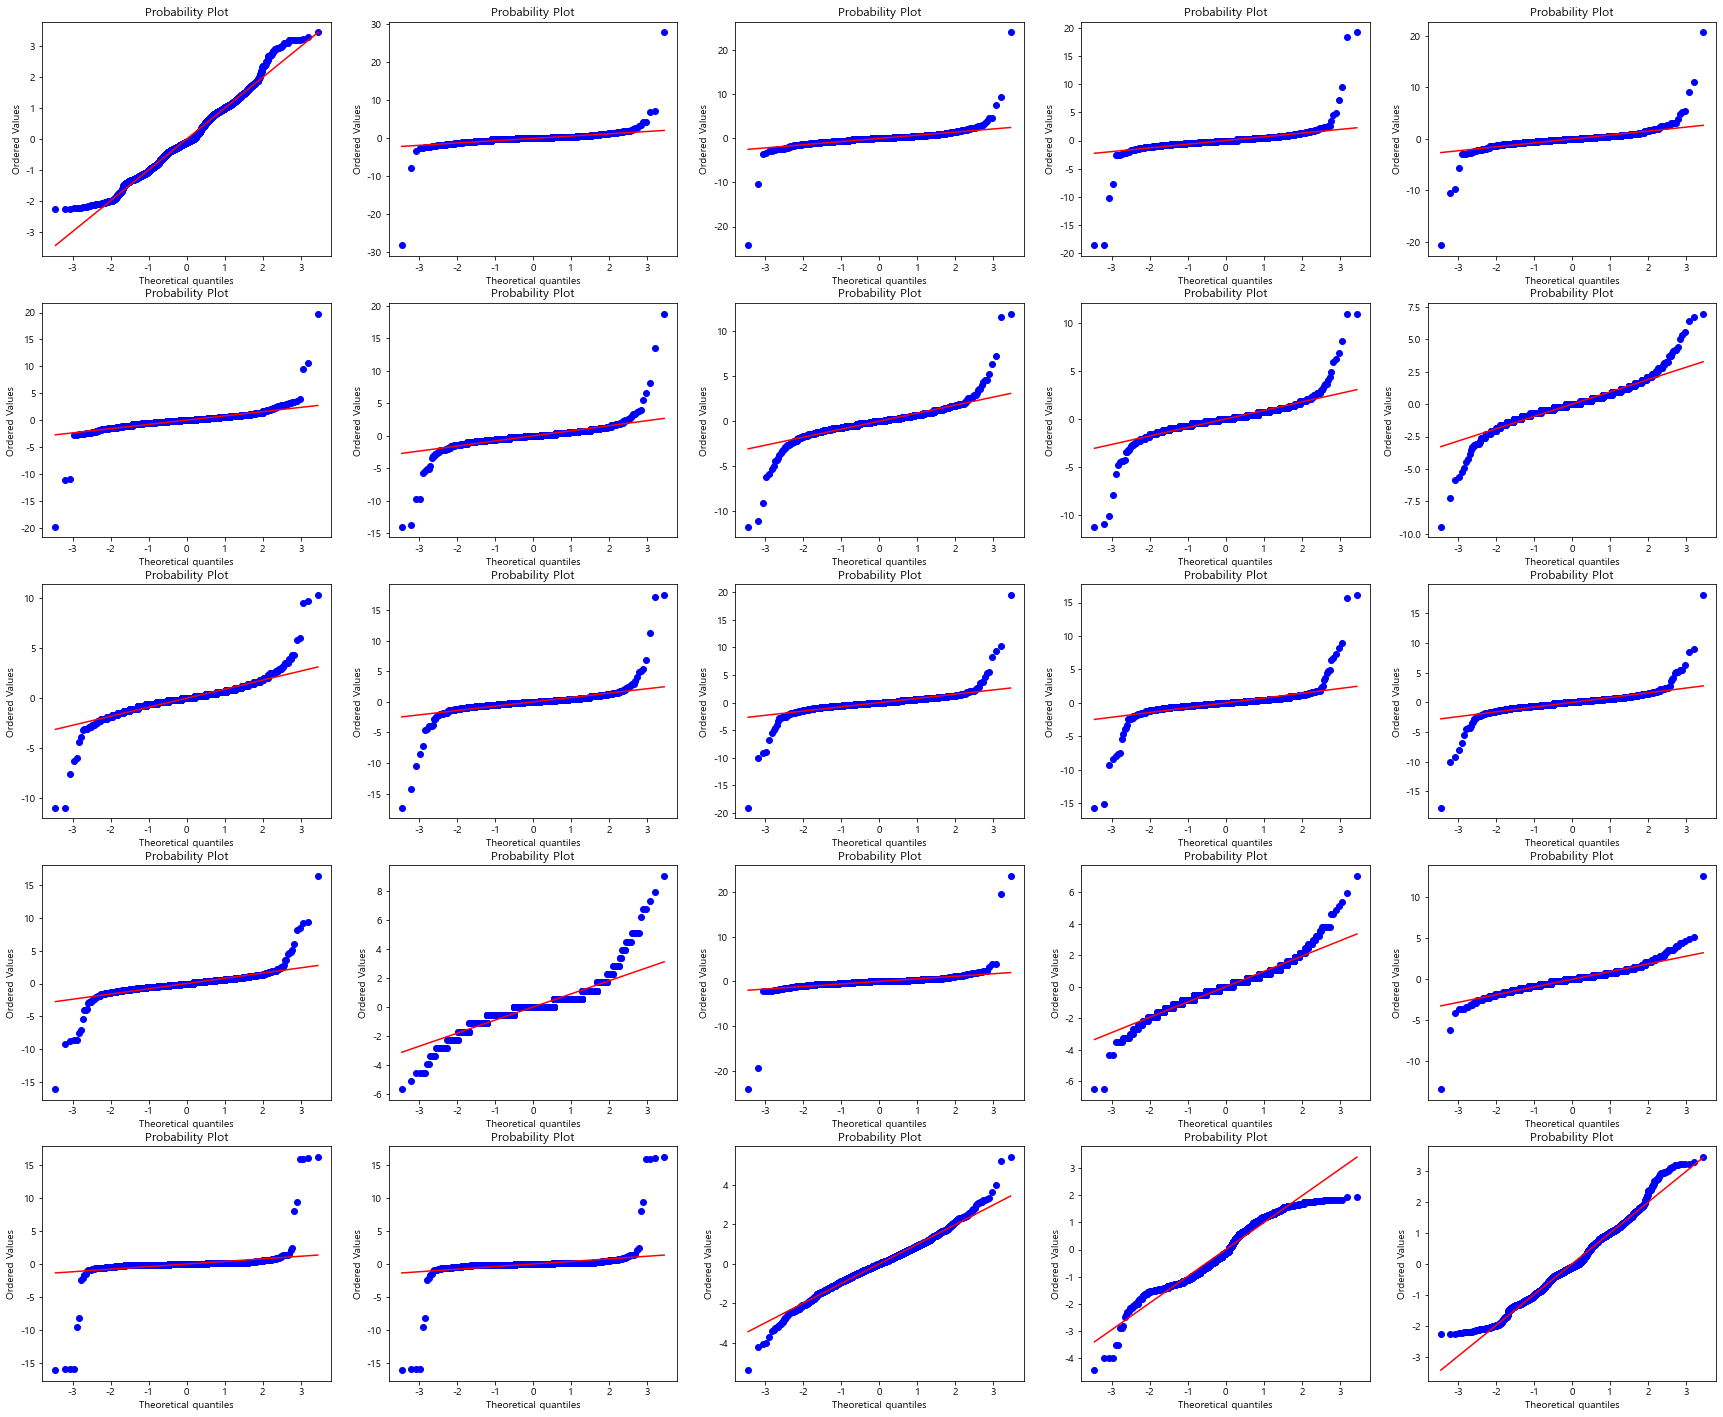

In [ ]:
## qq plot
col_n = 5
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(df_scaled.columns):
    stats.probplot(df_scaled[col],dist=stats.norm, plot=ax[int(i/col_n),int(i%col_n)])

In [ ]:
# 윈저라이징 시도 
# 망가지는거 확인
from scipy.stats.mstats import winsorize
for col in df.columns:
    df[col] = winsorize(df[col], limits= 0.005)

In [ ]:
#스케일링 전 정규성테스트
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import kstest

for i in df.columns:
    a = stats.shapiro(df[i])
    p = a.pvalue   
    print(i,p)

종가_ex 2.1730155923358613e-14
1Y_대비_irs 4.740114693878706e-37
2Y_대비_irs 5.673040591164453e-31
3Y_대비_irs 4.038456451430781e-31
5Y_대비_irs 8.734566076562434e-28
10Y_대비_irs 1.2308559726308515e-25
1Y_대비_crs 3.364705689454719e-30
2Y_대비_crs 1.5358234356134726e-25
3Y_대비_crs 6.021967320416888e-27
5Y_대비_crs 1.2973767917231298e-25
10Y_대비_crs 1.454821472232149e-25
대비_베이시스1년 2.8792187613636632e-33
대비_베이시스2년 1.367794367983046e-26
대비_베이시스3년 1.0862749690638027e-29
대비_베이시스5년 5.643328491866786e-26
대비_베이시스10년 4.2136311917600366e-27
대비_국고1년 5.338947149077553e-42
대비_국고3년 2.718129441643679e-31
대비_국고5년 1.3844555232206939e-24
대비_국고10년 5.4404403695768625e-24
대비_통안1년 0.0
대비_통안2년 0.0
대비_ndf 6.706020627689213e-09
스왑포인트_1월물 5.811001370309578e-25
전일종가_ex 3.0195281225473686e-14


In [ ]:
#스케일링후 ks테스트
for i in df.columns:
    a = kstest(df[i],'norm')
    p = a.pvalue
    print(i,p)

종가_ex 0.0
1Y_대비_irs 0.0
2Y_대비_irs 0.0
3Y_대비_irs 0.0
5Y_대비_irs 0.0
10Y_대비_irs 0.0
1Y_대비_crs 0.0
2Y_대비_crs 0.0
3Y_대비_crs 0.0
5Y_대비_crs 0.0
10Y_대비_crs 0.0
대비_베이시스1년 3.404756942477778e-138
대비_베이시스2년 9.874219690473493e-139
대비_베이시스3년 2.554331478893163e-161
대비_베이시스5년 7.71779193697715e-176
대비_베이시스10년 1.46723179934958e-191
대비_국고1년 0.0
대비_국고3년 0.0
대비_국고5년 0.0
대비_국고10년 0.0
대비_통안1년 0.0
대비_통안2년 0.0
대비_ndf 1.2386561181451482e-239
스왑포인트_1월물 1.7261092244135925e-88
전일종가_ex 0.0


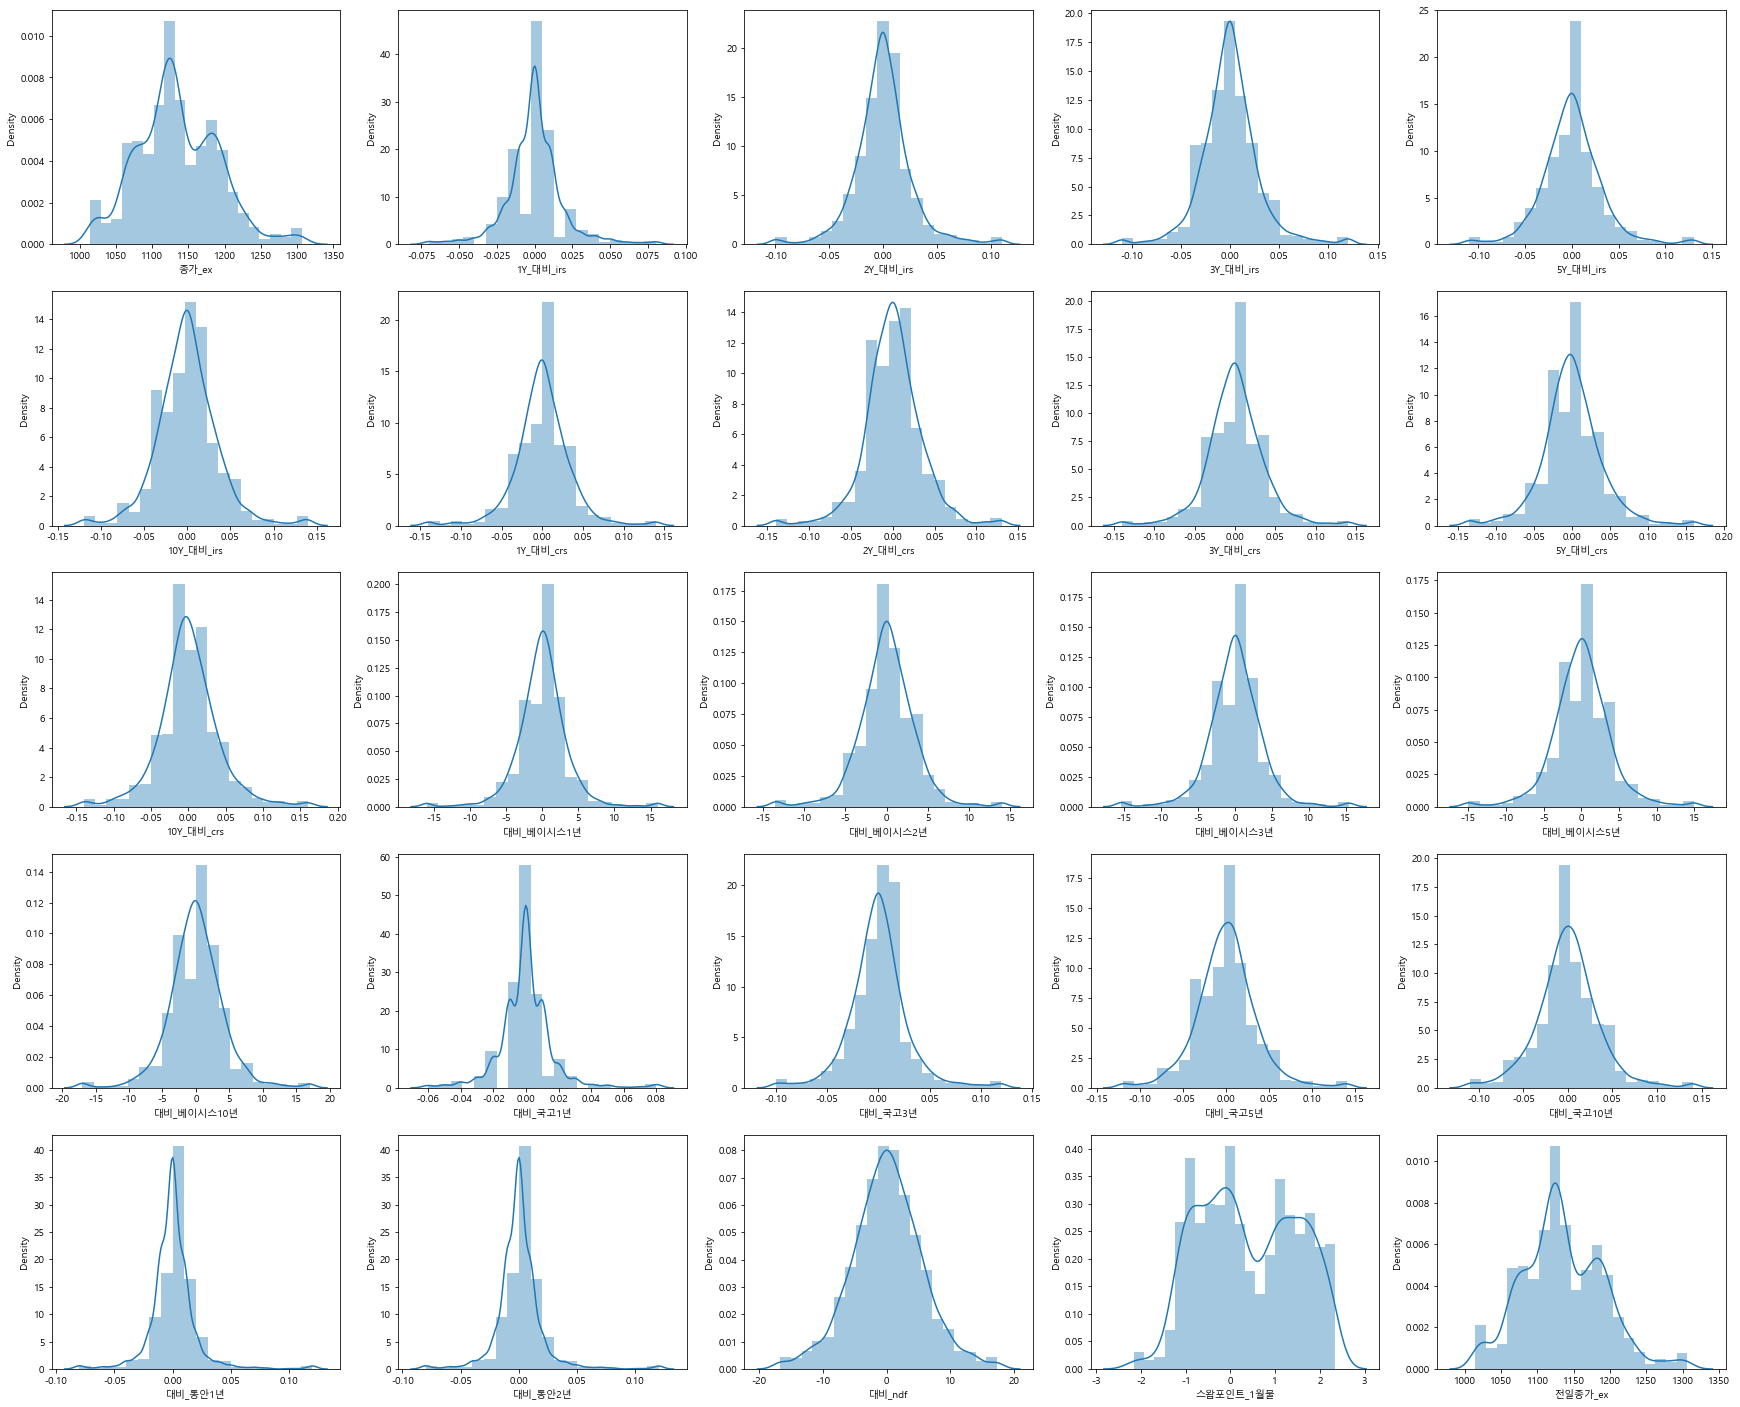

In [ ]:
## histogram
col_n = 5
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(df.columns):
    sns.distplot(df[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])

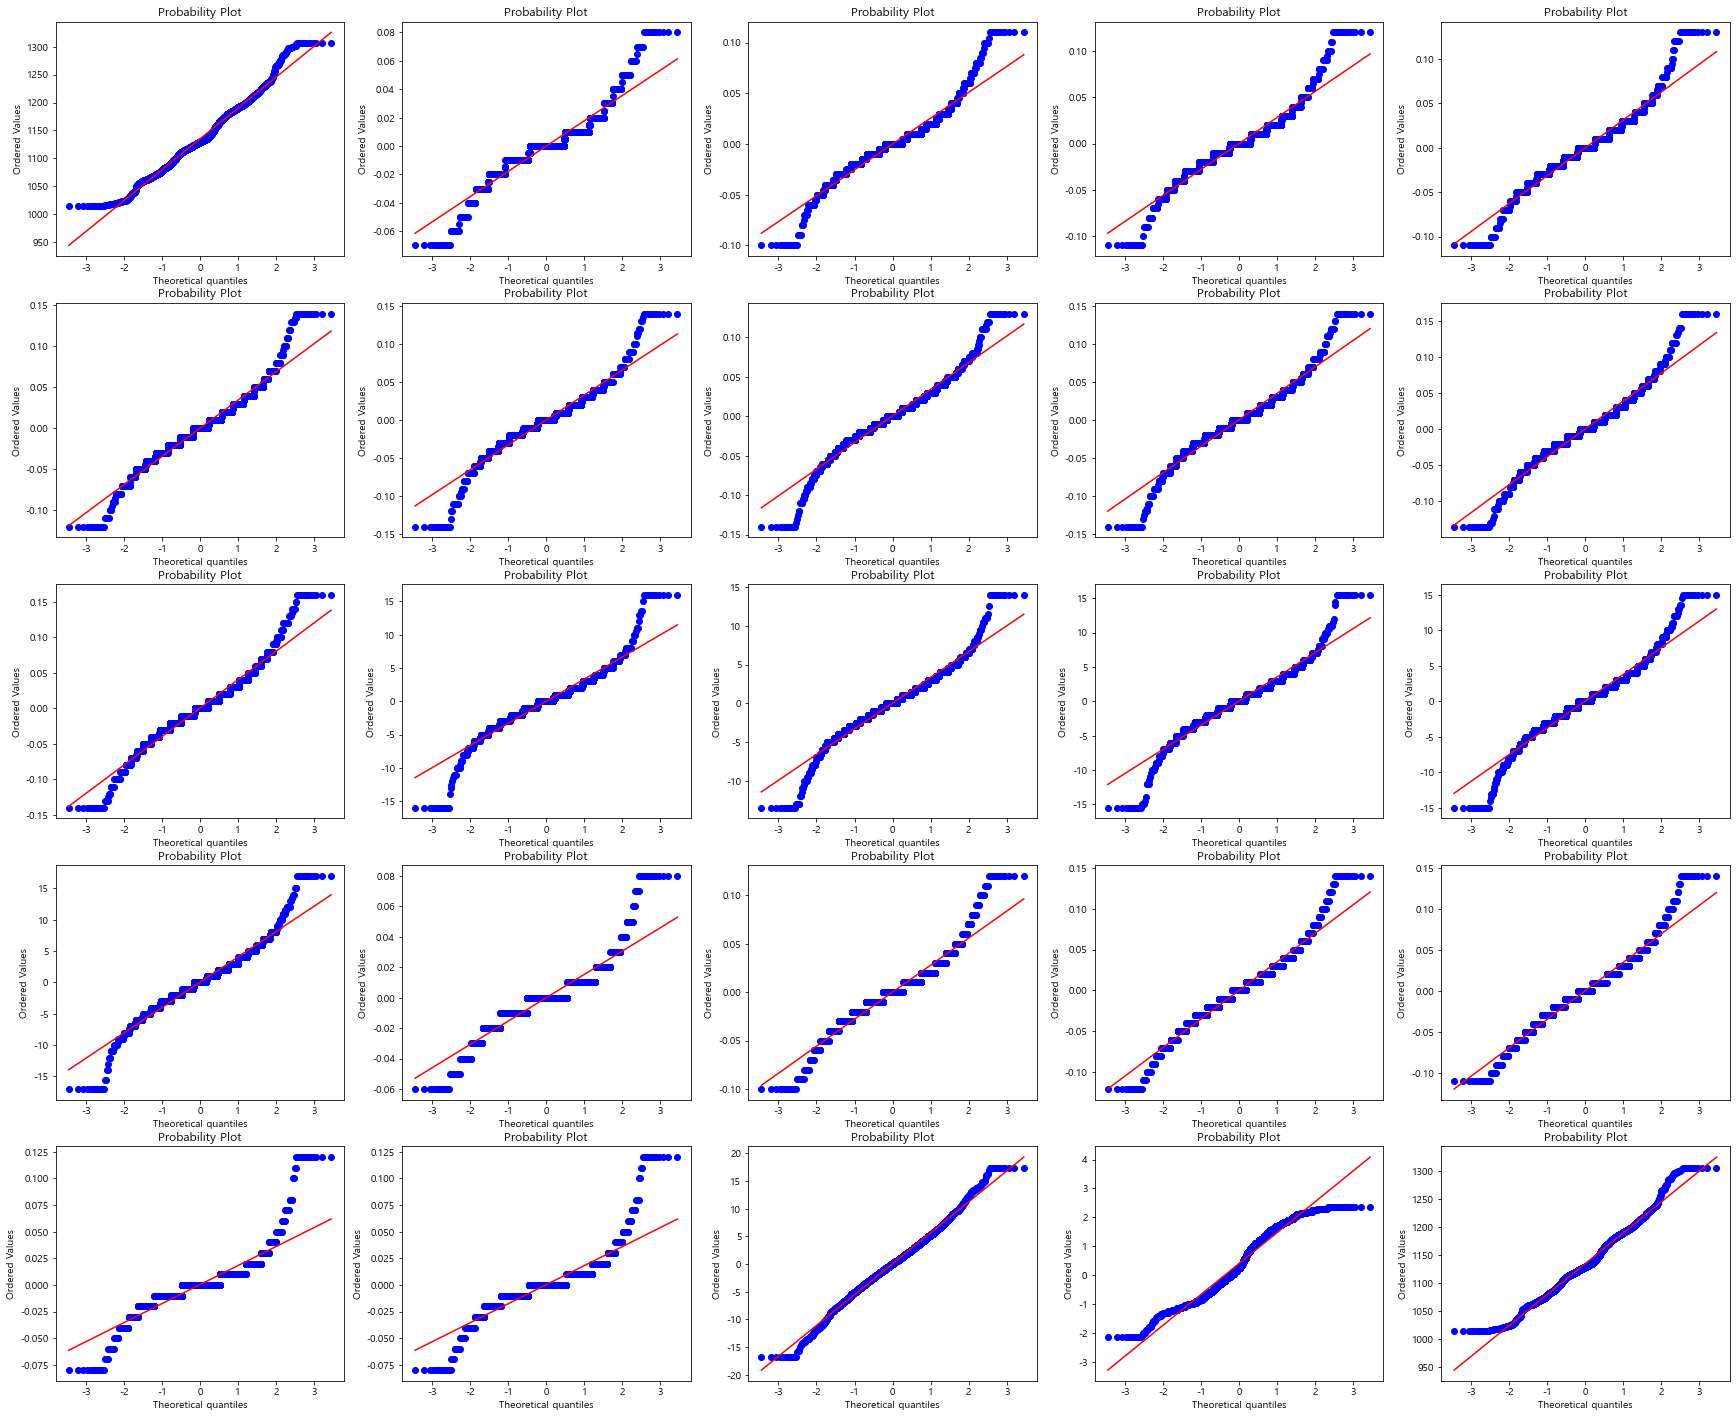

In [ ]:
## qq plot
col_n = 5
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(df.columns):
    stats.probplot(df[col],dist=stats.norm, plot=ax[int(i/col_n),int(i%col_n)])

In [ ]:
# 정규성 없는거 확인 
# 스케일링 코드
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

scaler.fit(df)
df_Data_scaled= scaler.transform(df)
df_scaled = pd.DataFrame (data = df_Data_scaled, columns=df.columns)
df_scaled

,종가_ex,1Y_대비_irs,2Y_대비_irs,3Y_대비_irs,5Y_대비_irs,10Y_대비_irs,1Y_대비_crs,2Y_대비_crs,3Y_대비_crs,5Y_대비_crs,...,대비_베이시스10년,대비_국고1년,대비_국고3년,대비_국고5년,대비_국고10년,대비_통안1년,대비_통안2년,대비_ndf,스왑포인트_1월물,전일종가_ex
0,-0.057194,-1.601327,-1.901390,-1.727652,-1.554770,-1.423640,-0.304162,0.862377,1.115654,1.004599,...,2.168831,-1.815156,-1.388449,-1.124122,-1.134442,-1.521024,-1.521024,0.300666,1.795958,-0.149867
1,-0.001352,-1.601327,-1.141020,-1.037237,-0.933165,-0.569004,-0.304162,-0.445102,-0.571896,-2.040153,...,-3.148253,-1.209200,-0.694295,-1.968330,-1.984237,-1.018444,-1.018444,0.703155,1.795958,-0.056029
2,-0.105831,1.068456,0.759907,0.688801,0.620846,0.285632,-0.007892,-0.735652,-0.853154,-1.025236,...,-1.214768,0.608666,0.346936,0.001488,-0.001382,0.489295,0.489295,-1.711781,1.795958,-0.000088
3,-0.109433,0.534500,-0.000464,-0.001614,0.310044,0.570510,0.584648,0.426551,-0.009379,-1.786424,...,-2.423196,-0.603245,-0.000141,0.001488,-0.001382,-0.515865,-0.515865,0.077061,1.795958,-0.104752
4,-0.118440,0.534500,0.759907,0.688801,0.620846,0.855389,0.288378,-0.009275,-0.009379,-0.517777,...,-1.698139,-0.603245,-0.694295,-0.561317,-0.567912,-0.515865,-0.515865,0.211224,1.795958,-0.108362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454,3.087975,-2.135284,-3.041946,-2.418067,-2.797980,-3.132912,-2.378052,-2.624233,-1.978188,-2.801341,...,-0.006339,-1.209200,-2.082603,-1.968330,-2.550767,-0.515865,-0.515865,0.586881,-0.914983,3.094740
2455,3.087975,-0.533414,-0.760834,-1.037237,-0.933165,-0.853883,0.288378,-0.880928,-0.853154,-0.517777,...,0.235346,0.608666,-1.041372,-0.561317,-0.851177,0.489295,0.489295,0.193335,-1.006879,3.094740
2456,3.087975,-0.533414,-1.901390,-2.072859,-1.865573,-1.708519,0.288378,-0.299826,-0.290637,-0.264048,...,1.202089,0.002711,-1.041372,-1.405525,-1.700972,0.991875,0.991875,-0.101824,-0.869035,3.094740
2457,2.904237,1.602413,1.520277,1.724423,1.553253,1.994903,1.177189,1.152928,1.115654,0.750870,...,-1.214768,0.608666,1.388167,0.845695,2.264737,0.991875,0.991875,-0.817360,-0.960931,3.094740


In [ ]:
#스케일링 전 정규성테스트
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import kstest

for i in df.columns:
    a = stats.shapiro(df[i])
    p = a.pvalue   
    print(i,p)

종가_ex 2.1730155923358613e-14
1Y_대비_irs 4.740114693878706e-37
2Y_대비_irs 5.673040591164453e-31
3Y_대비_irs 4.038456451430781e-31
5Y_대비_irs 8.734566076562434e-28
10Y_대비_irs 1.2308559726308515e-25
1Y_대비_crs 3.364705689454719e-30
2Y_대비_crs 1.5358234356134726e-25
3Y_대비_crs 6.021967320416888e-27
5Y_대비_crs 1.2973767917231298e-25
10Y_대비_crs 1.454821472232149e-25
대비_베이시스1년 2.8792187613636632e-33
대비_베이시스2년 1.367794367983046e-26
대비_베이시스3년 1.0862749690638027e-29
대비_베이시스5년 5.643328491866786e-26
대비_베이시스10년 4.2136311917600366e-27
대비_국고1년 5.338947149077553e-42
대비_국고3년 2.718129441643679e-31
대비_국고5년 1.3844555232206939e-24
대비_국고10년 5.4404403695768625e-24
대비_통안1년 0.0
대비_통안2년 0.0
대비_ndf 6.706020627689213e-09
스왑포인트_1월물 5.811001370309578e-25
전일종가_ex 3.0195281225473686e-14


In [ ]:
#스케일링후 ks테스트
for i in df.columns:
    a = kstest(df[i],'norm')
    p = a.pvalue
    print(i,p)

종가_ex 0.0
1Y_대비_irs 0.0
2Y_대비_irs 0.0
3Y_대비_irs 0.0
5Y_대비_irs 0.0
10Y_대비_irs 0.0
1Y_대비_crs 0.0
2Y_대비_crs 0.0
3Y_대비_crs 0.0
5Y_대비_crs 0.0
10Y_대비_crs 0.0
대비_베이시스1년 3.404756942477778e-138
대비_베이시스2년 9.874219690473493e-139
대비_베이시스3년 2.554331478893163e-161
대비_베이시스5년 7.71779193697715e-176
대비_베이시스10년 1.46723179934958e-191
대비_국고1년 0.0
대비_국고3년 0.0
대비_국고5년 0.0
대비_국고10년 0.0
대비_통안1년 0.0
대비_통안2년 0.0
대비_ndf 1.2386561181451482e-239
스왑포인트_1월물 1.7261092244135925e-88
전일종가_ex 0.0


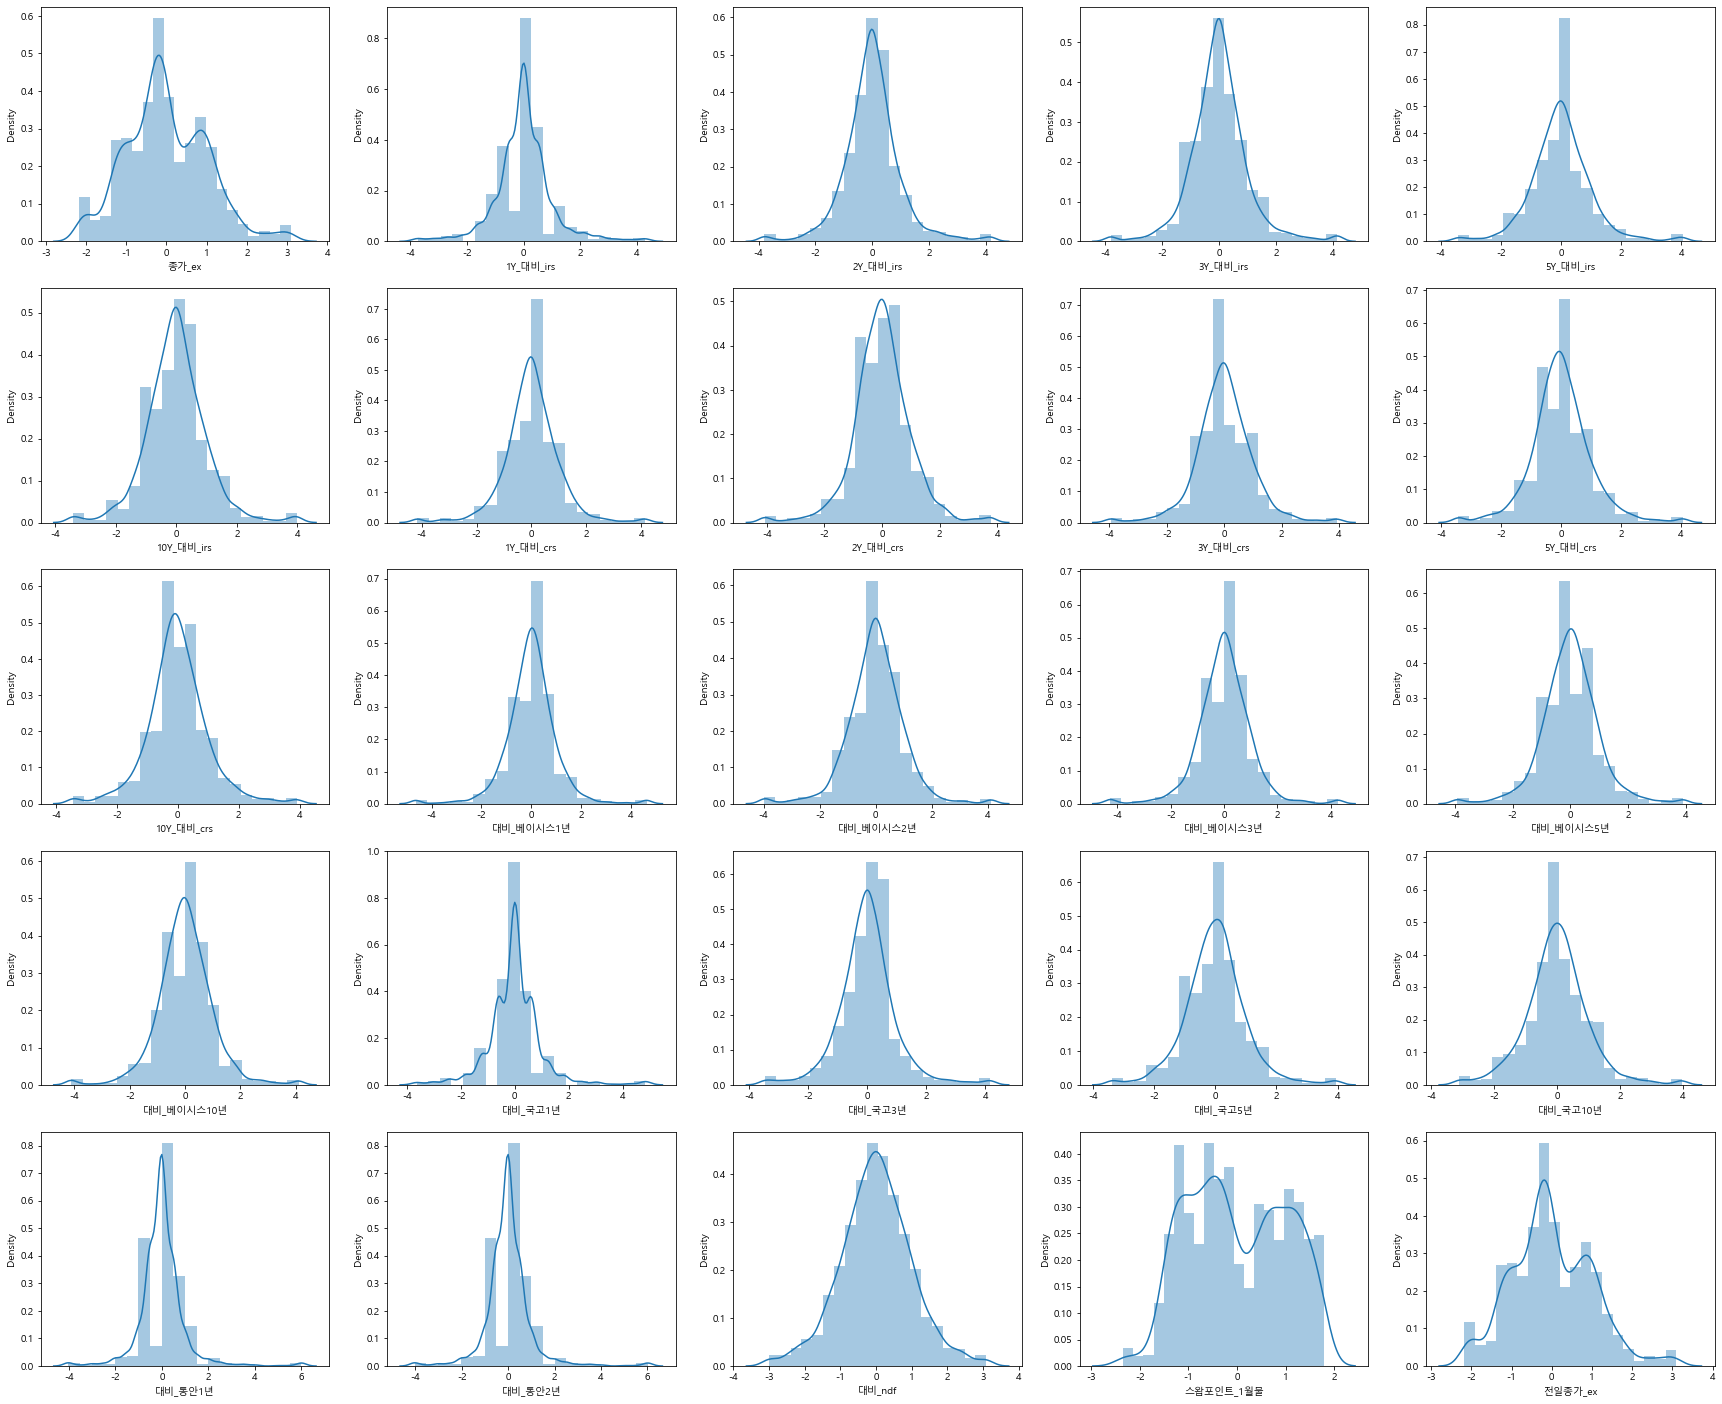

In [ ]:
## histogram
col_n = 5
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(df_scaled.columns):
    sns.distplot(df_scaled[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])

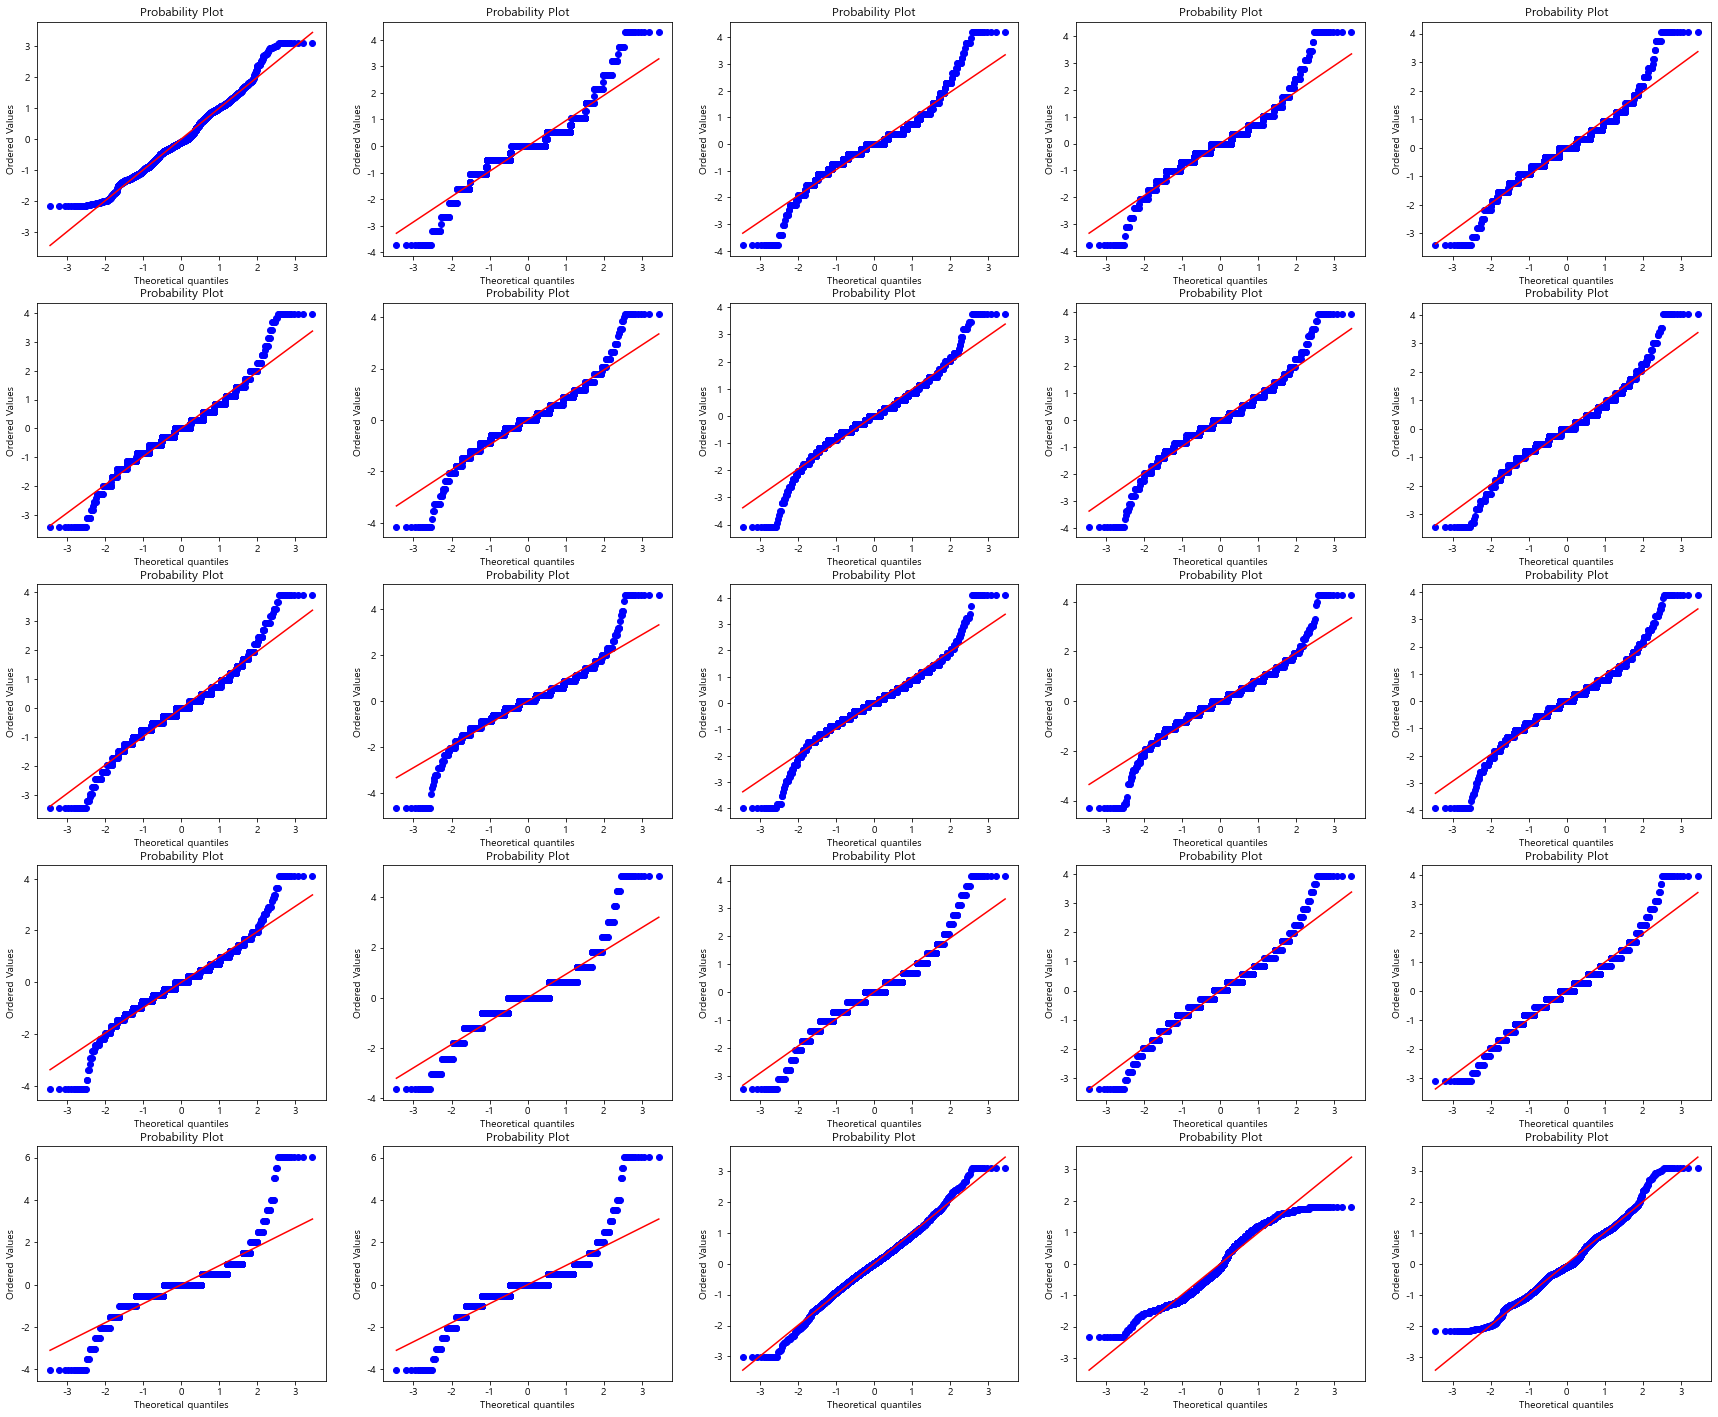

In [ ]:
## qq plot
col_n = 5
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(df_scaled.columns):
    stats.probplot(df_scaled[col],dist=stats.norm, plot=ax[int(i/col_n),int(i%col_n)])